In [1]:
import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam

##Download Data

In [2]:
import pandas as pd

tweet = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv")

In [3]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweet.shape

(7613, 5)

In [5]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


##Exploratory Data Analysis

###Target Class Distribution

In [6]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 80

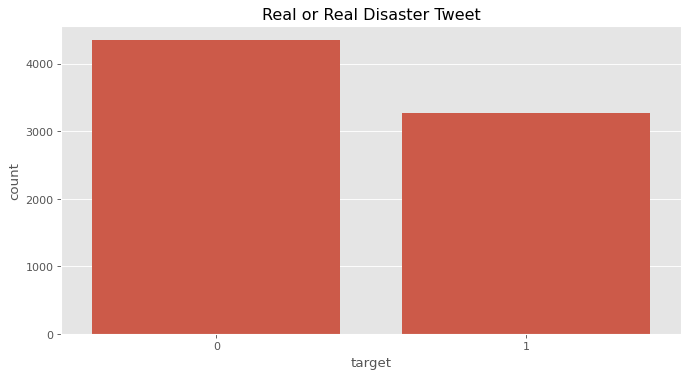

In [7]:
sns.countplot(x='target', data=tweet)
plt.title('Real or Real Disaster Tweet')
plt.show()

In [8]:
tweet['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: ylabel='count'>

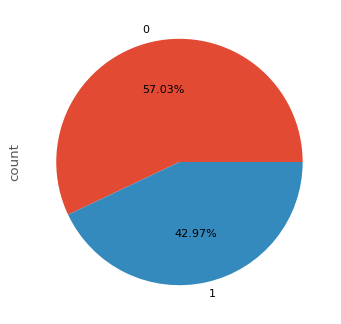

In [9]:
tweet['target'].value_counts().plot.pie(autopct='%1.2f%%')

##Number of Characters Distribution in tweets

In [10]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-og4kv_6k
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-og4kv_6k
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit e5b1f0710cb1ea5ebbc73d30abe8d45a07cbb399
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7623 sha256=afaf4949b71ff6300f330c029aeecb68ff701e18d2866223845721d3e11956c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-s6a_z8ny/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [11]:
import preprocess_kgptalkie as kgp


In [12]:
tweet = kgp.get_basic_features(tweet)

In [13]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


<ipython-input-14-72f162dc66a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweet['char_counts'])


<Axes: xlabel='char_counts', ylabel='Density'>

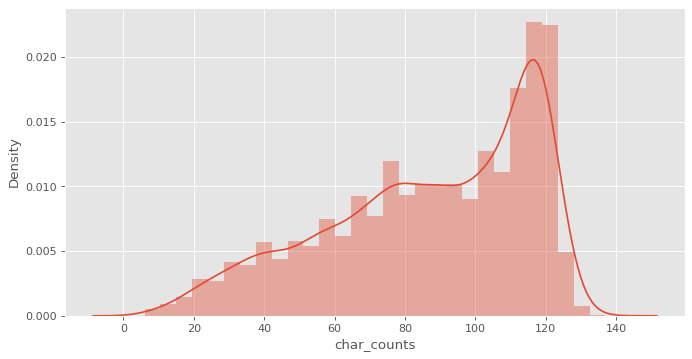

In [14]:
sns.distplot(tweet['char_counts'])

<ipython-input-15-7433aa2a83b9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet['char_counts'], shade=True)


<Axes: xlabel='char_counts', ylabel='Density'>

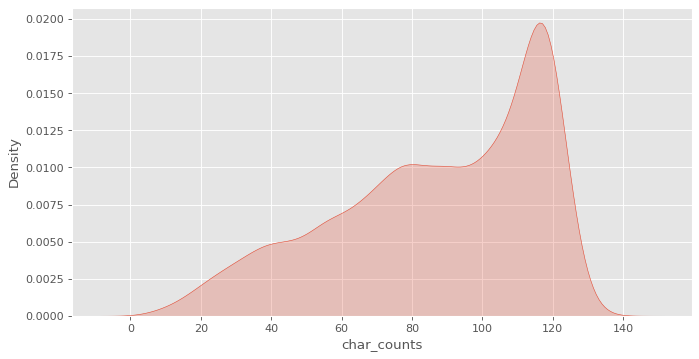

In [15]:
sns.kdeplot(tweet['char_counts'], shade=True)

<Axes: xlabel='char_counts', ylabel='Density'>

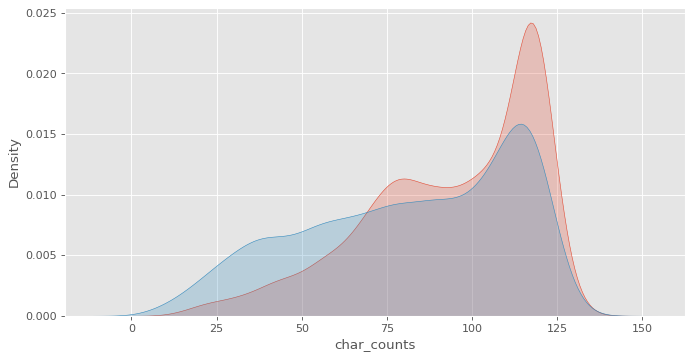

In [16]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], fill=True)
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], fill=True)

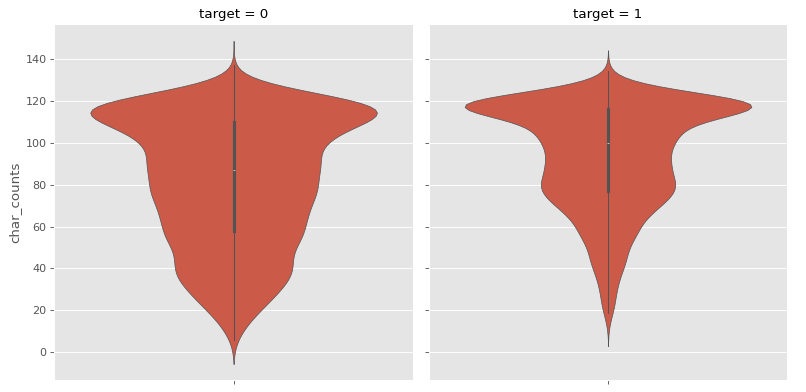

In [17]:
sns.catplot(y='char_counts', data=tweet, kind='violin', col='target')

##Number of words,Average Words Length, and Stop Words Distribution in Tweets

<Axes: xlabel='word_counts', ylabel='Density'>

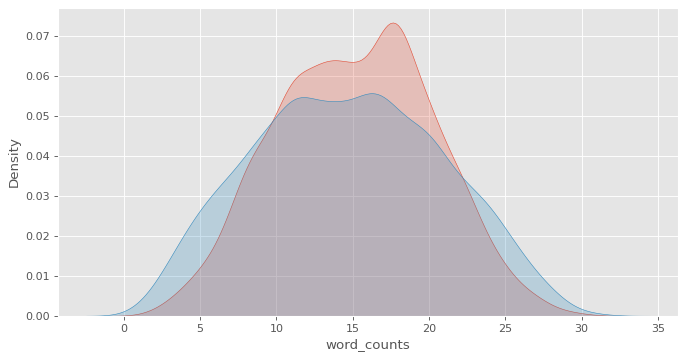

In [18]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], fill=True)
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], fill=True)

<Axes: xlabel='avg_wordlength', ylabel='Density'>

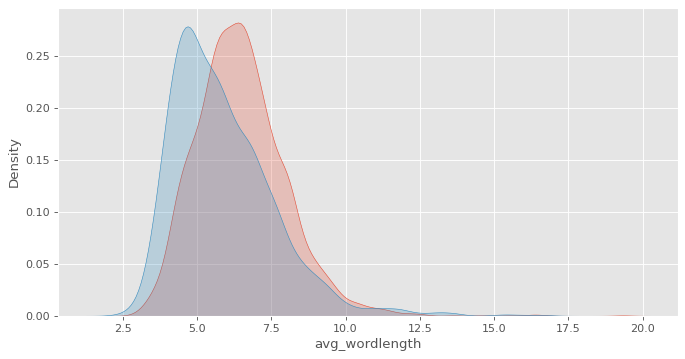

In [19]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], fill=True)
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], fill=True)

<Axes: xlabel='stopwords_counts', ylabel='Density'>

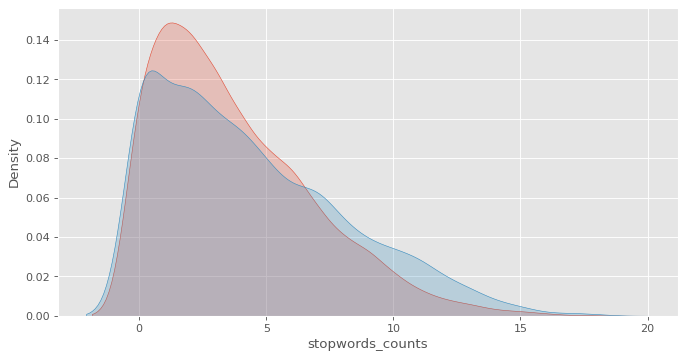

In [20]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], fill=True)
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], fill=True)

##Most and Least Common Words

In [21]:
freqs = kgp.get_word_freqs(tweet, 'text')

In [22]:
top20 = freqs[:20]

<BarContainer object of 20 artists>

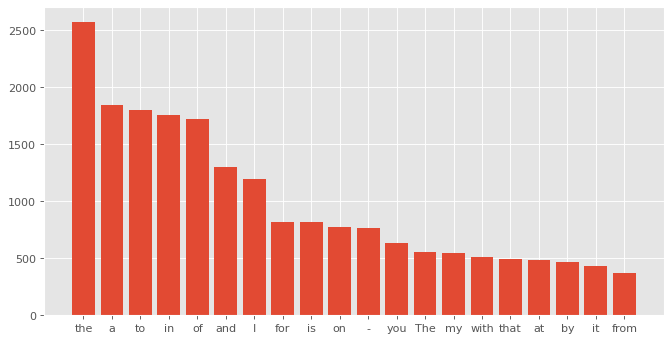

In [23]:
plt.bar(top20.index, top20.values)

In [24]:
least20 = freqs[-20:]
least20

http://t.co/JD7rIK7fX0     1
ft.åÊM.O.P.                1
http://t.co/ZDTz3RbS6w     1
'Detonate.'                1
@ApolloBrown's             1
PLAY                       1
missed.                    1
detonate&amp;Shots         1
succeed                    1
marines                    1
@BBCTalkback               1
@rfcgeom66                 1
@tomfromireland            1
@SourMashNumber7           1
#FIYA!                     1
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
Name: count, dtype: int64

In [25]:
bigram = kgp.get_ngram(tweet, 'text' , ngram_range=2)

In [26]:
bigram[:20]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

##One Shot Data Cleaning

In [27]:
def get_clean(x):
    x = str(x).lower().replace('\\', ' ').replace('_', ' ').replace('.',' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [28]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [29]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [30]:
kgp.get_ngram(tweet, 'text', ngram_range=2)[:20]

[('zxathetis are', 67861),
 ('zurich for', 67860),
 ('zumiez is', 67859),
 ('zss vs', 67858),
 ('zourryart forgot', 67857),
 ('zouma just', 67856),
 ('zouma has', 67855),
 ('zotar50 skeleton', 67854),
 ('zoom in', 67853),
 ('zonewolf123 liked', 67852),
 ('zonesthank god', 67851),
 ('zones donuat', 67850),
 ('zone with', 67849),
 ('zone what', 67848),
 ('zone war', 67847),
 ('zone they', 67846),
 ('zone protectdenaliwolves', 67845),
 ('zone outside', 67844),
 ('zone of', 67843),
 ('zone my', 67842)]

##Disaster Words Visualization with Word Cloud

In [31]:
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')
real = " ".join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

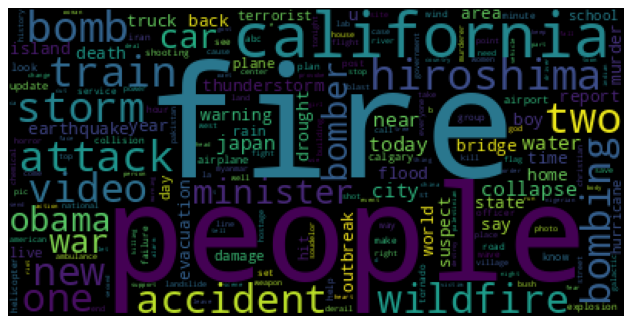

In [32]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [33]:
nreal = kgp.get_word_freqs(tweet[tweet['target']==0], 'text')
nreal = " ".join(nreal.index)
nreal

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has or we no when now about what would an how one can there body people 2 via her been his into video more loud us love know back time why got off them emergency full see after who day 3 youtube going cannot did still some fire let good go she had want think laughing man should our ass over retweet world then way life their first youre work last too burning need make only really news than god because being many much here even best take content could help wreck him say 5 right were its black feel great today please hot every fucking 4 look im never down 1 fear cross ever before bags read top fuck oh does night bag without reddit come these everyone another getting any year death panic ruin head liked screaming bloody shit may u always smoke bad wrecked harm buildings most w coming well crash explode disaster face school

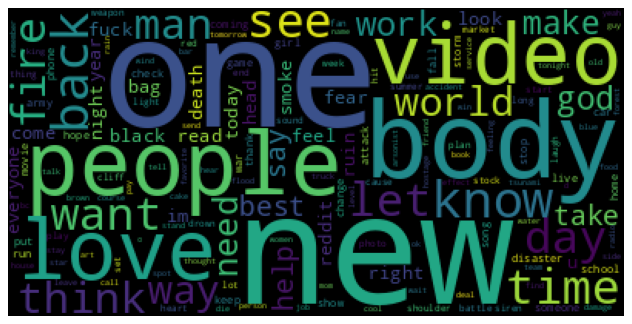

In [34]:
word_cloud = WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

##Classsification with TFIDF and SVM

In [35]:
text = tweet['text']
y = tweet['target']


In [36]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)


In [37]:
X.shape

(7613, 22545)

In [38]:
X

<7613x22545 sparse matrix of type '<class 'numpy.float64'>'
	with 107268 stored elements in Compressed Sparse Row format>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print()
    print("Classification Report")
    print(classification_report(y_test, y_pred))

In [41]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       869
           1       0.82      0.72      0.77       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



##Classification with Word2Vec and SVM

In [42]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [43]:
import spacy
import en_core_web_lg

In [44]:
nlp = en_core_web_lg.load()

In [45]:
x = 'cat dog'
doc = nlp(x)

In [46]:
doc.vector.shape

(300,)

In [47]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector

In [48]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [49]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.8476947, 0.8888447, -3.10391, 0.090650745,..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.35491997, -1.5415528, -2.0926642, -0.49523..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[-2.8959212, 0.6998072, -2.5640087, 1.2561336,..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-2.3889112, -0.6061475, -2.453201, 1.5150287,..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.8628482, -0.2587669, -2.5594664, 0.3031685..."


In [50]:
X = tweet['vec'].to_numpy()
X = X.reshape(-1, 1)

In [51]:
X.shape

(7613, 1)

In [52]:
import numpy as np
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [53]:
X.shape

(7613, 300)

In [54]:
y = tweet['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       869
           1       0.85      0.63      0.72       654

    accuracy                           0.79      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523

CPU times: user 9.25 s, sys: 49.5 ms, total: 9.3 s
Wall time: 10 s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##Word Embeddings and Classification with Deep Learning

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten ,Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [58]:
text

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       130 people receive wildfires evacuation orders...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m1 94 0104 coordinated universal time5km s of ...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [59]:
token = Tokenizer()
token.fit_on_texts(text)

In [60]:
vocab_size = len(token.word_index) + 1
vocab_size

22581

In [61]:
print(token.word_index)

{'httpt': 1, 'the': 2, 'a': 3, 'in': 4, 'to': 5, 'of': 6, 'i': 7, 'and': 8, 'is': 9, 'you': 10, 'for': 11, 'on': 12, 'it': 13, 'my': 14, 'not': 15, 'that': 16, 'with': 17, 'at': 18, 'by': 19, 'this': 20, 'have': 21, 'are': 22, 'from': 23, 'be': 24, 'was': 25, 'httpst': 26, 'do': 27, 'like': 28, 'as': 29, 'out': 30, 'am': 31, 'so': 32, 'your': 33, 'up': 34, 'me': 35, 'just': 36, 'but': 37, 'will': 38, 'after': 39, 'has': 40, 'all': 41, 'no': 42, 'fire': 43, 'an': 44, 'when': 45, 'if': 46, 'he': 47, 'new': 48, 'we': 49, 'get': 50, 'they': 51, 'now': 52, 'about': 53, 'via': 54, 'more': 55, 'people': 56, 'what': 57, 'or': 58, 'how': 59, 'one': 60, 'been': 61, 'there': 62, '2': 63, 'over': 64, 'news': 65, 'would': 66, 'who': 67, 'into': 68, 'were': 69, 'video': 70, 'can': 71, 'emergency': 72, 'disaster': 73, 'us': 74, 'police': 75, 'than': 76, 'off': 77, 'her': 78, 'some': 79, 'still': 80, 'his': 81, 'body': 82, 'back': 83, 'time': 84, 'burning': 85, 'california': 86, 'crash': 87, 'know': 8

In [62]:
encoded_text = token.texts_to_sequences(text)

In [63]:
print(encoded_text)

[[109, 4491, 22, 2, 868, 6, 20, 246, 129, 1681, 4492, 74, 41], [186, 43, 223, 763, 6792, 6793, 1328], [41, 1682, 1435, 5, 2062, 4, 655, 22, 125, 6794, 19, 1683, 42, 438, 253, 58, 2062, 4, 655, 1329, 22, 1054], [2809, 56, 4493, 1330, 253, 1329, 4, 86], [36, 93, 1159, 20, 314, 23, 6795, 2063, 29, 261, 23, 1330, 6796, 68, 3, 189], [2810, 391, 86, 1554, 793, 829, 4, 637, 6797, 534, 5, 1106, 372, 43, 4494, 1330], [224, 73, 830, 282, 1160, 831, 247, 6, 1862, 4, 6798, 999, 2344, 1555], [7, 31, 12, 225, 6, 2, 1863, 8, 7, 71, 103, 3, 43, 4, 2, 4495], [62, 9, 44, 72, 253, 1237, 52, 4, 2, 585, 832, 2, 703], [7, 31, 2345, 16, 2, 489, 9, 240, 5, 109, 354], [586, 56, 611, 23, 2, 283, 467, 32, 612], [833, 613, 2811, 9, 217, 2812, 3467, 656, 3, 657, 7, 199, 4, 613, 2811, 57, 31, 7, 301, 27, 57, 31, 7, 301, 27, 6799, 247], [2813, 247, 2064, 6800, 2811, 1436, 58, 1864, 614, 7, 21, 735, 3468], [224, 4, 4496, 912, 49, 1684, 4496], [241, 5, 189, 392, 12, 2346, 4, 4497, 126, 87, 355], [638, 34, 96], [7, 110

In [64]:
max_length = 40
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [65]:
print(X)

[[ 109 4491   22 ...    0    0    0]
 [ 186   43  223 ...    0    0    0]
 [  41 1682 1435 ...    0    0    0]
 ...
 [2709 2295 4483 ...    0    0    0]
 [  75 1092   39 ...    0    0    0]
 [   2  206   55 ...    0    0    0]]


In [66]:
X.shape

(7613, 40)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
%%time
# clf = LinearSVC()
# run_SVM(clf, X_train, X_test, y_train, y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [69]:
vec_size = 100
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))


model.add(Dense(1, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))



In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           2258100   
                                                                 
 conv1d (Conv1D)             (None, 39, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 dense (Dense)               (None, 19, 32)            1056      
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                        

In [71]:
%%time
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
191/191 [==============================] - 9s 38ms/step - loss: 0.6794 - accuracy: 0.5703 - val_loss: 0.6533 - val_accuracy: 0.5811
Epoch 2/5
191/191 [==============================] - 6s 33ms/step - loss: 0.6344 - accuracy: 0.6565 - val_loss: 0.6253 - val_accuracy: 0.7085
Epoch 3/5
191/191 [==============================] - 7s 35ms/step - loss: 0.5824 - accuracy: 0.7470 - val_loss: 0.5901 - val_accuracy: 0.7308
Epoch 4/5
191/191 [==============================] - 7s 36ms/step - loss: 0.5299 - accuracy: 0.7885 - val_loss: 0.5822 - val_accuracy: 0.7170
Epoch 5/5
191/191 [==============================] - 7s 35ms/step - loss: 0.4768 - accuracy: 0.8304 - val_loss: 0.5798 - val_accuracy: 0.7124
CPU times: user 45.1 s, sys: 1.29 s, total: 46.4 s
Wall time: 35.6 s


In [72]:
def get_encoded(x):
  x = get_clean(x)

  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding='post')
  return x

In [73]:
x = 'i am scared to see this earthquake'
vec = get_encoded(x)

In [74]:
vec

array([[  7,  31, 966,   5, 103,  20, 246,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]], dtype=int32)

In [75]:
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 194ms/step


array([0])

##BERT Model Building and Training

In [76]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 41.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316934 sha256=4abb00c20336646c0e0f93754920fb7aa86a1b0fbb54eff152dabc9e6403aeec
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=

In [77]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.8476947, 0.8888447, -3.10391, 0.090650745,..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.35491997, -1.5415528, -2.0926642, -0.49523..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[-2.8959212, 0.6998072, -2.5640087, 1.2561336,..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-2.3889112, -0.6061475, -2.453201, 1.5150287,..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.8628482, -0.2587669, -2.5594664, 0.3031685..."


In [78]:
from ktrain import text
import ktrain

In [79]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=tweet, text_column='text', label_columns='target', preprocess_mode='bert',maxlen=40)

['not_target', 'target']
      not_target  target
4811         1.0     0.0
1619         1.0     0.0
4654         1.0     0.0
6946         1.0     0.0
5242         0.0     1.0
['not_target', 'target']
      not_target  target
1163         0.0     1.0
5887         0.0     1.0
7421         0.0     1.0
480          0.0     1.0
6421         0.0     1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [80]:
model = text.text_classifier(name='bert', train_data=(X_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 40


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [81]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train), val_data=(X_test, y_test), batch_size=64)

In [82]:
learner.fit_onecycle(lr=2e-5, epochs=1)



begin training using onecycle policy with max lr of 2e-05...
108/108 [==============================] - 3124s 29s/step - loss: 0.5060 - accuracy: 0.7446 - val_loss: 0.3710 - val_accuracy: 0.8373


In [82]:
learner.fit_onecycle(lr = 2e-5, epochs=3)

In [ ]:
# find out the best learning rate
learner.lr_find(show_plot=True, max_epochs=10)
learner.lr_plot()

In [83]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [86]:
data = ['i met you today by accident', 'i am scared to see this earthquake']

In [87]:
predictor.predict(data, return_proba=True)

array([[0.87501085, 0.12498914],
       [0.2032935 , 0.7967065 ]], dtype=float32)

In [88]:
predictor.predict(data)

['not_target', 'target']

In [89]:
classes = predictor.get_classes()

In [92]:
y_pred = predictor.predict(data[0])
classes.index(y_pred)

0

In [93]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)